# ECE 227: Homework 3
## Part (A): Network Visualization

In [3]:
%%time
#import useful packages, all of them are important but not necessarily used in this code
#enable inline plotting in Python Notebook
#supress warnings

%pylab inline
import networkx as nx
import numpy as np
import matplotlib
import scipy
import warnings
warnings.filterwarnings('ignore')
import time
import os

Populating the interactive namespace from numpy and matplotlib
CPU times: user 2.08 s, sys: 1.37 s, total: 3.45 s
Wall time: 2.39 s


### You can access the network datasets exactly in the way you accessed them for HW 1. 
### Please DO NOT copy the datasets to your directory because it could result in 'timeout' errors during the submission. 
### Now that you are familiar with Gephi and its usage, you will explore some of its built-in tools to improve your visualizations. You will need your results from HW1. Only use the results obtained using NetworkX here. This can be done by adding your results on the node degrees, centralities etc. as attributes to the nodes.

### In this task, we will use the Filter tool of Gephi to threshold the available network data using various properties.
### Visualise the Facebook, Enron-emails and Collaboration (Erdos) networks while applying the following thresholds. Make sure to have all the visualizations labelled with appropriate node labels. This is quite an open-ended question, as you have a lot of scope to make your visualizations better by trying out different layouts, colors etc. So, turn in the best visualization that you get in each case. You should attach an image (.png, .jpg) for each visualization here in the notebook itself. Also, make sure that it is well readable.
### (1) Top ~20% nodes, thrsholded by Node Degree
### (2) Top ~1% nodes, thrsholded by Node Degree
### (3) Top ~20% nodes, thrsholded by Betweeness Centrality
### (4) Top ~1% nodes, thrsholded by Betweeness Centrality

### You may reproduce some of your HW 1 images in response to this task.

(-0.5, 1023.5, 1023.5, -0.5)

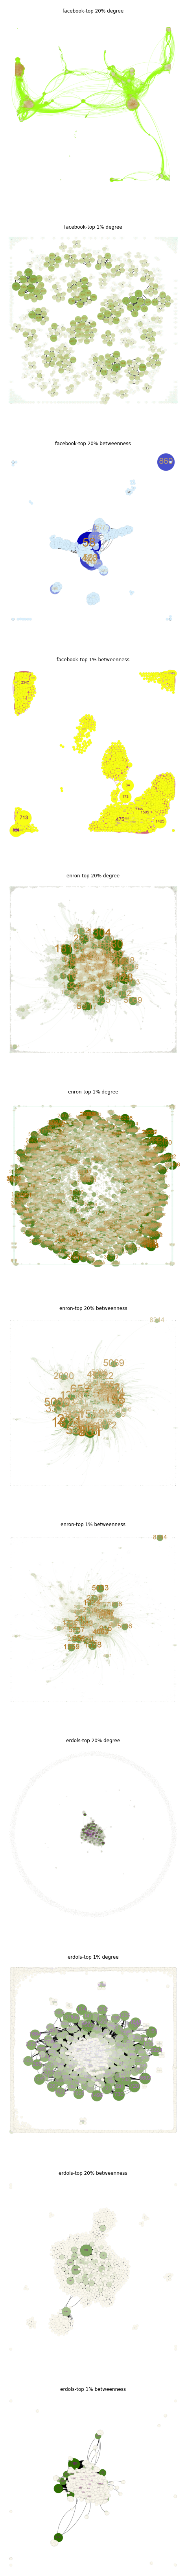

In [3]:
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(120, 120))

img1 = cv2.imread('fb20d.png') 
plt.subplot(12,1,1)
plt.title('\nfacebook-top 20% degree')
plt.imshow(img1)
plt.axis('off')

img2 = cv2.imread('fb1d.png')
plt.subplot(12,1,2)
plt.title('\nfacebook-top 1% degree')
plt.imshow(img2)
plt.axis('off')

img3 = cv2.imread('fb20b.png')
plt.subplot(12,1,3)
plt.title('\nfacebook-top 20% betweenness')
plt.imshow(img3)
plt.axis('off')

img4 = cv2.imread('fb1b.png')
plt.subplot(12,1,4)
plt.title('\nfacebook-top 1% betweenness')
plt.imshow(img4)
plt.axis('off')

img5 = cv2.imread('enr20d.png')
plt.subplot(12,1,5)
plt.title('\nenron-top 20% degree')
plt.imshow(img5)
plt.axis('off')

img6 = cv2.imread('enr1d.png')
plt.subplot(12,1,6)
plt.title('\nenron-top 1% degree')
plt.imshow(img6)
plt.axis('off')

img7 = cv2.imread('enr20b.png')
plt.subplot(12,1,7)
plt.title('\nenron-top 20% betweenness')
plt.imshow(img7)
plt.axis('off')

img8 = cv2.imread('enr1b.png')
plt.subplot(12,1,8)
plt.title('\nenron-top 1% betweenness')
plt.imshow(img8)
plt.axis('off')

img9 = cv2.imread('erd20d.png')
plt.subplot(12,1,9)
plt.title('\nerdols-top 20% degree')
plt.imshow(img9)
plt.axis('off')

img10 = cv2.imread('erd1d.png')
plt.subplot(12,1,10)
plt.title('\nerdols-top 1% degree')
plt.imshow(img10)
plt.axis('off')

img11 = cv2.imread('erd20b.png')
plt.subplot(12,1,11)
plt.title('\nerdols-top 20% betweenness')
plt.imshow(img11)
plt.axis('off')

img12 = cv2.imread('erd1b.png')
plt.subplot(12,1,12)
plt.title('\nerdols-top 1% betweenness')
plt.imshow(img12)
plt.axis('off')

## Part (B): Community Detection

### In this task, we will try to find communities in the given networks and learn more about them. There are libraries that can be used with NetworkX for community detection (http://perso.crans.org/aynaud/communities/). In addition to NetworkX, we will also use igraph library in this task for community detection purposes. If not already available, install the following required packages and have a look at their documentations to gain some familiarity with them. More information on community detection can also be found here: https://arxiv.org/abs/0906.0612

In [4]:
!pip install python-louvain
!pip install python-igraph

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 204 kB 17.6 MB/s eta 0:00:01
  Created wheel for python-louvain: filename=python_louvain-0.15-py3-none-any.whl size=9401 sha256=ce9f0757ba63698d8b299aad6c19efdc40a7e0eecfff31521f5d301731585260
  Stored in directory: /tmp/xdg-cache/pip/wheels/c8/68/21/d04741956802581119d875a0d9fce6895e8f9ffae71223f3e3
Successfully built python-louvain
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 3.2 MB 17.6 MB/s eta 0:00:01


### There are multiple algorithms to detect communities. One of the commonly used algorithms is Louvain algorithm. The method is a greedy optimization method that attempts to optimize the "modularity" of a partition of the network. The 'community' library uses Louvain algorithm, and hence we get partitions based on optimized modularity. Implement a python code using the 'community' library to find communities in the Citations network and the Collaboration network (Erdos). Write your code in the next cell and visualize your community detection results in Gephi for both the networks. Label the nodes in the visualization properly. Use the largest connected components, if required. Include the images (.jpg, .png) of your visualizations here.

In [5]:
import community

##################################################citNet##################################################

file_name = "data/citNet/citNet_combined.txt"
#convert the information in the text file into a graph, find no. of edges & nodes in the graph

g1=nx.read_edgelist(file_name,create_using=nx.Graph(),nodetype=int)
node, edge=g1.order(),g1.size()
print(nx.info(g1))

partition = community.best_partition(g1)

Name: 
Type: Graph
Number of nodes: 27770
Number of edges: 352324
Average degree:  25.3744


In [19]:
nodes, part = zip(*sorted(partition.items()))

DICT = {}
for node, part1 in zip (nodes, part):
    DICT[node] = {}
    DICT[node]["community"] = part1

nx.set_node_attributes(g1, DICT)
nx.write_gml(g1, "citNetCom.gml")

In [6]:
##################################################erdos###################################################

g2 = nx.Graph()
dict_authors = {}
dict_authors['Paul Erdos'] = 0
g2.add_node(0)
g2.nodes[0]['author'] = 'Paul Erdos'

# add the authors with Erdos number 1 and 2 from file
line_count = 1
skip_line = 24
skip_space = 1

is_new = False
author = ""
coauthor = ""
index = 1
ind_author = 1
ind_coauthor = 1

def parseLine(l, start):
    end = start
    while end < len(l) - 1 and not (l[end] == ' ' and l[end + 1] == ' '):
        end += 1
    return l[start:end]

def addAuthor(auth, ind):
    if auth in dict_authors:
        return ind
    dict_authors[auth] = ind
    return ind + 1

for l in open("data/erdos/Erdos1.html"):    
    if line_count >= skip_line:
        if l == '\n':
            is_new = True
        elif is_new:
            author = parseLine(l, 0)
            index = addAuthor(author, index)
            ind_author = dict_authors[author]
            g2.add_edge(0, ind_author)
            g2.nodes[ind_author]['author'] = author
            is_new = False
        elif l == '</pre>':
            break
        else:
            coauthor = parseLine(l, skip_space)
            index = addAuthor(coauthor, index)
            ind_coauthor = dict_authors[coauthor]
            g2.add_edge(ind_author, ind_coauthor)
            g2.nodes[ind_coauthor]['author'] = coauthor
    line_count += 1

print(nx.info(g2))

#first compute the best partition
partition = community.best_partition(g2)

Name: 
Type: Graph
Number of nodes: 11524
Number of edges: 18504
Average degree:   3.2114


In [52]:
nodes, part = zip(*sorted(partition.items()))

DICT = {}
for node, part1 in zip (nodes, part):
    DICT[node] = {}
    DICT[node]["community"] = part1

nx.set_node_attributes(g2, DICT)
nx.write_gml(g2, "erdolsCom.gml")

(-0.5, 1023.5, 1023.5, -0.5)

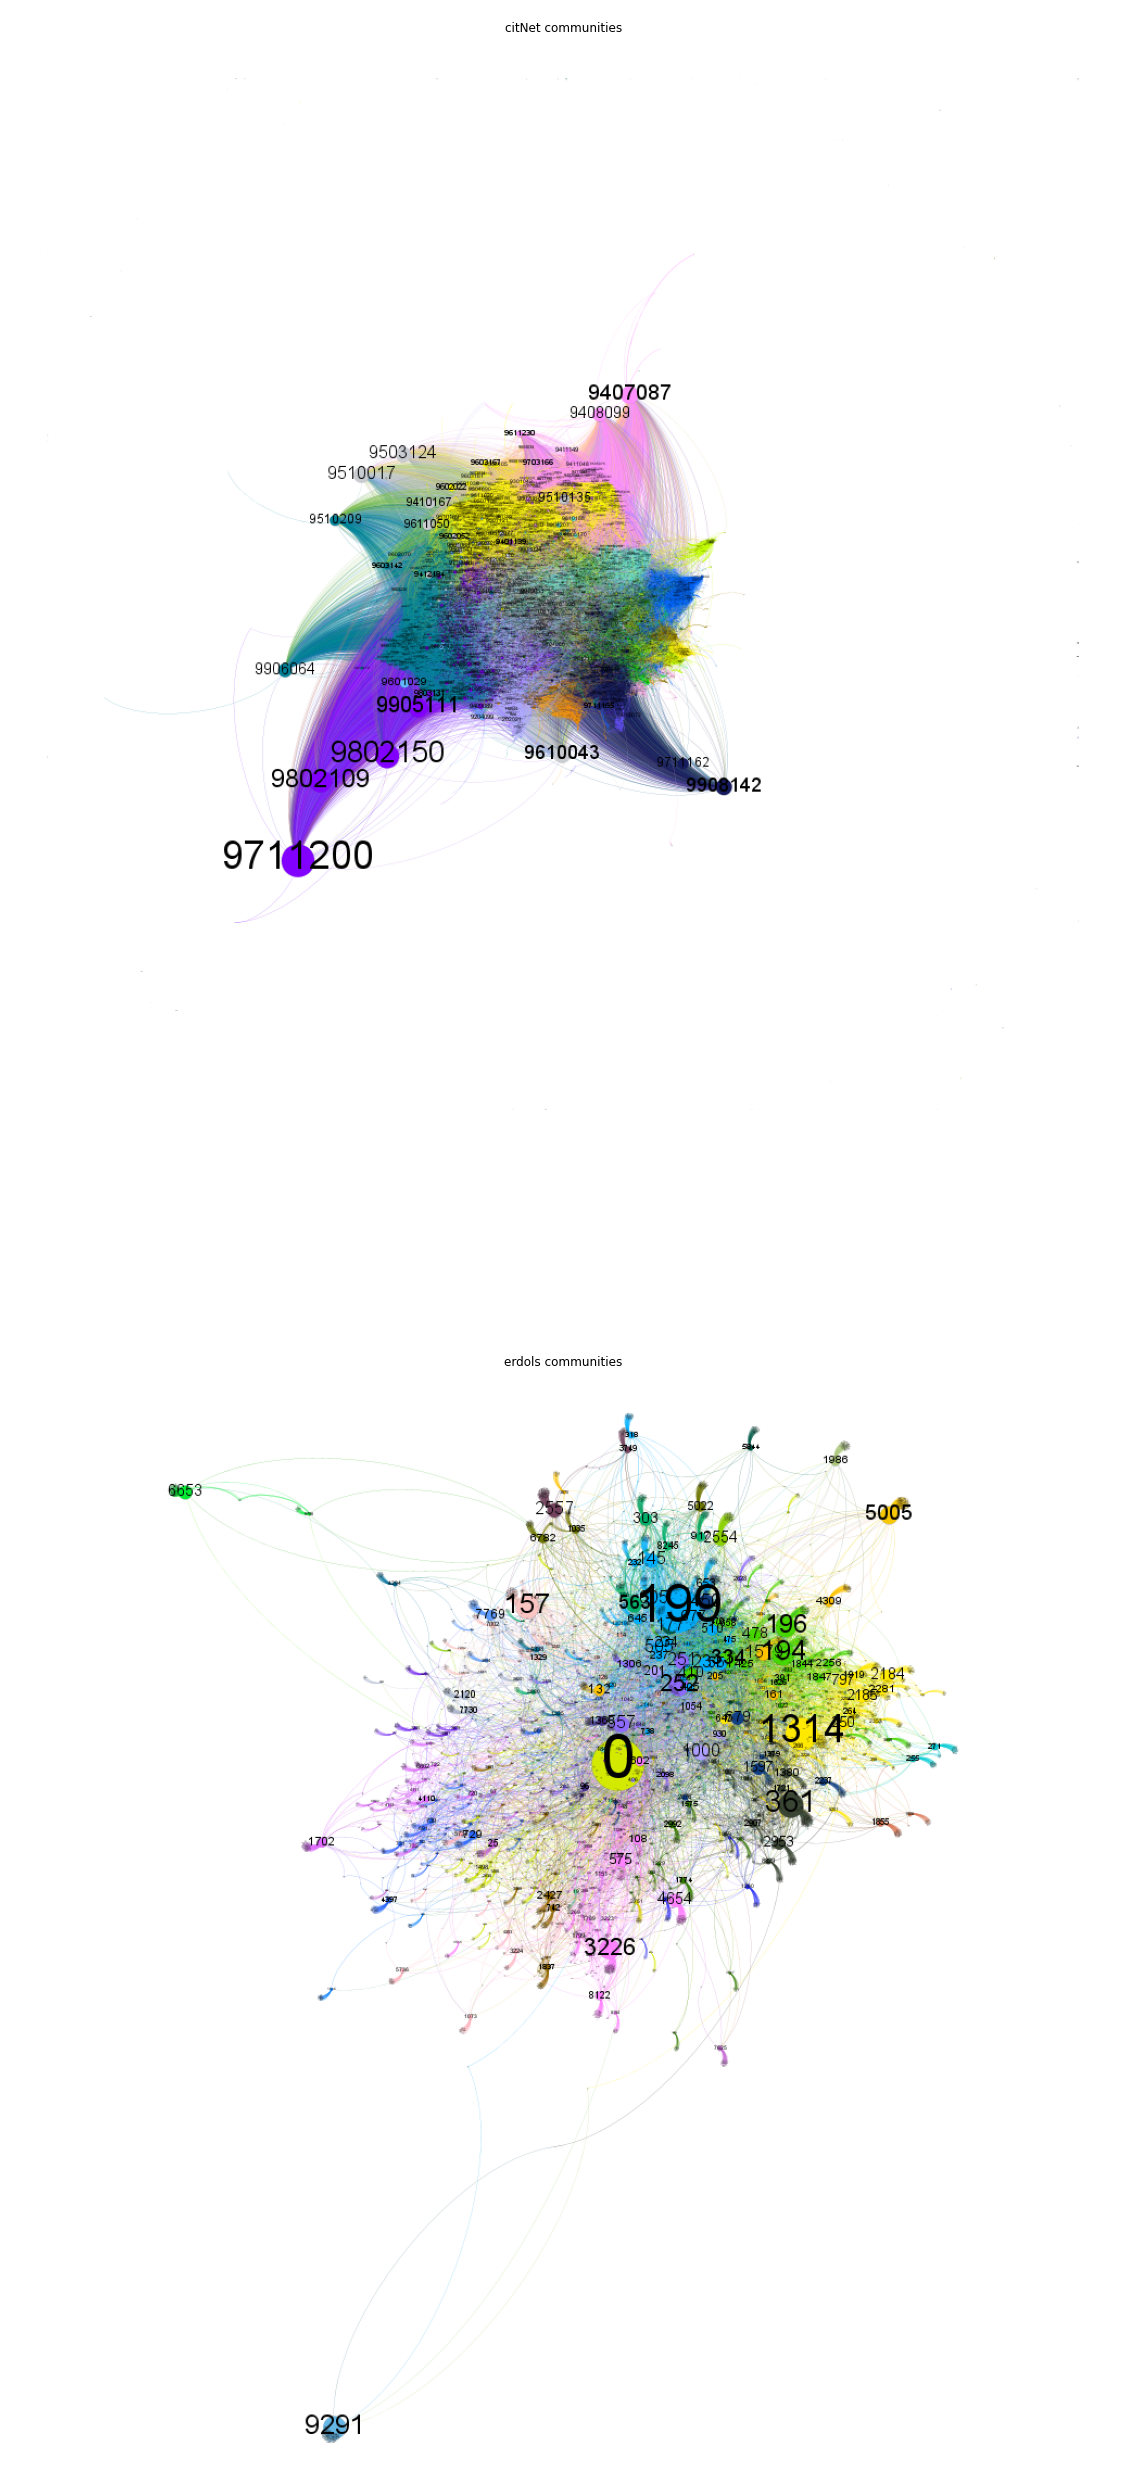

In [24]:
plt.figure(figsize=(45, 45))

img1 = cv2.imread('citNetCom.png') 
plt.subplot(2,1,1)
plt.title('\ncitNet communities')
plt.imshow(img1)
plt.axis('off')

img2 = cv2.imread('erdolsCom.png')
plt.subplot(2,1,2)
plt.title('\nerdols communities')
plt.imshow(img2)
plt.axis('off')

### Compared to 'community' library, 'igraph' has more flexibilty to detect communities. Igraph allows the user to partition the network into the number of communities that the user wishes. Obviously this number is bounded. Now, you will use this feature to divide the given network into '5' communities using 'igraph' and observe the results. Write a python code to implement the above task for the Citation and the Erdos networks. Remember that unlike 'community', igraph provides multiple approaches to community detection, the most obvious approach being the greedy one because it optimizes modularity. Visualize your community detection results in Gephi for both the networks. Label the nodes in the visualization properly. Use largest connected components if required. Use different colors for nodes in every community. Include the images(.jpg, .png) of your visualizations here.

In [54]:
import igraph as ig

largest1 = g1.subgraph(max(nx.connected_components(g1), key=len)).copy()

g3 = ig.Graph.from_networkx(largest1)

# dendrogram = ig.Graph.community_fastgreedy(g4)

#membership = dendrogram.as_clustering().membership

clustering1 = ig.Graph.community_leading_eigenvector(g3,5)

In [55]:
DICT = {}
# ct = 0
# ct1 = 0
# ct2 = 0
# ct3 = 0
# ct4 = 0
# cta = 0
# ctall = 0
for node, part1 in zip (range(len(clustering1.membership)), clustering1.membership):
    DICT[node] = {}
    DICT[node]["community"] = part1
#     if part1 == 0:
#         ct += 1
#     elif part1 == 1:
#         ct1 += 1
#     elif part1 == 2:
#         ct2 += 1
#     elif part1 == 3:
#         ct3 += 1
#     elif part1 == 4:
#         ct4 += 1
#     else :
#         cta += 1
#     ctall += 1
# #     print(part1)
# print(ct, ct1, ct2, ct3, ct4, cta, ctall)

g3.vs["community"] = clustering1.membership
ig.Graph.write_gml(g3, "citNetIgr.gml")

In [10]:
largest2 = g2.subgraph(max(nx.connected_components(g2), key=len)).copy()

g4 = ig.Graph.from_networkx(largest2)

# dendrogram = ig.Graph.community_fastgreedy(g4)

#membership = dendrogram.as_clustering().membership

clustering = ig.Graph.community_leading_eigenvector(g4,5)

In [11]:
DICT = {}
for node, part1 in zip (range(len(clustering.membership)), clustering.membership):
    DICT[node] = {}
    DICT[node]["community"] = part1

nx.set_node_attributes(g2, DICT)
nx.write_gml(g2, "erdolsIgr.gml")

### Now that you have detected the communities, you will analyze your results further. This task is only for the Collaboration network (Erdos). Use results from the communtiy detection performed using 'community'. Sort the communities and get the largest 5 communities. For each of these 5 communities, get 3 nodes with the highest node degree. So you will get 3 authors per community, for 5 communities. Now, find out the areas of research of each of these authors and enlist them. Further, observe if there is any reason for these 3 authors to be in same community (do this for each community). State this reason in brief. Write all of your results in the next cell. Also include any other interesting results that you may observe during the process.

In [123]:
import operator

sorted_part = sorted(partition.items(), key=operator.itemgetter(1))

coms = [0]*(max(partition.values())+1)
ct = -1
com = 0
top = [0]*5

for tuples in sorted_part:
    ct = ct+1
    if tuples[1] != com:
        coms[com] = ct
        if com > 4:
            for i in range(5):
                if ct > coms[top[i]]:
                    temp = top[i]
                    top[i] = com
                    for j in range(4-i):
                        temp1 = top[i+j+1]
                        top[i+j+1] = temp
                        temp = temp1
                    break
        else:
            top[com] = com
            if com == 4:
                ctlist = [int(coms[top[0]]),int(coms[top[1]]),int(coms[top[2]]),int(coms[top[3]]),int(coms[top[4]])]
                ctlist.sort(reverse = True)
                topcpy = top.copy()
                for k in range(5):
                    for l in range(5):
                        if coms[topcpy[l]] == ctlist[k]:
                            top[k] = topcpy[l]
                            break
        ct = 0
        com = tuples[1]
        
print("largest 5 communities: ", top)
        
authors = [-1]*15
for i in range(5):
    for tuples in sorted_part:
        if tuples[1] == top[i]:
            idx = sorted_part.index(tuples)
            break
    while top[i] == sorted_part[idx][1]:
        deg = g2.degree[sorted_part[idx][0]]
        if authors[i*3] != -1 and authors[i*3+1] != -1 and authors[i*3+2] != -1:
            minimum = min(g2.degree[authors[i*3]], g2.degree[authors[i*3+1]], g2.degree[authors[i*3+2]])
            if deg > minimum:
                if minimum == g2.degree[authors[i*3]]:
                    autidx = i*3
                elif minimum == g2.degree[authors[i*3+1]]:
                    autidx = i*3+1
                else :
                    autidx = i*3+2
                authors[autidx] = sorted_part[idx][0]
                
        else:
            if authors[i*3] == -1:
                authors[i*3] = sorted_part[idx][0]
            elif authors[i*3+1] == -1:
                authors[i*3+1] = sorted_part[idx][0]
            else:
                authors[i*3+2] = sorted_part[idx][0]
        idx = idx+1

print("15 authors corresponding to their communities in the order of size: ", authors)

largest 5 communities:  [7, 4, 28, 19, 6]
15 authors corresponding to their communities in the order of size:  [605, 199, 505, 194, 196, 334, 0, 575, 4654, 2184, 797, 2185, 2953, 361, 1380]


In [ ]:
###################################################################################################
# community 7:
# author 605: SAKS, MICHAEL EZRA - mathematician - area: computation theory, graph theory, combinatorics
# author 199: ALON, NOGA M. - mathematician - area: combinatorial algorithm, computer science
# author 505: LOVASZ, LASZLO - mathematician - area: probabilistic graph theory, combinatorics
# They are all studying in the area of combinatorics
        
# community 4:
# author 194: TUZA, ZSOLT - professor - area: graph algorithm, graph theory
# author 196: WEST, DOUGLAS BRENT - mathmatician - area: graph theory
# author 334: BOLLOBAS, BELA - methematician - area: functional analysis, combinatorics, graph theory
# These 3 authors have a same area of research, graph theory. Their works on discrete math and graph may establish connection between each others.
        
# community 28:
# author 0: Paul Erdos - mathematician - area: discrete math, graph theory, number theory, probability, approximation theory
# author 575: POMERANCE, CARL BERNARD - number theorist - area: number
# author 4654: SHALLIT, JEFFREY OUTLAW - computer scientist - area: combinatorics, formal languages, number theory
# They all have academic interest on number theory.
    
# community 19:
# author 2184: HEDETNIEMI, STEPHEN TRAVIS - methematician - area: combinatorics, computer science, information and communication
# author 797: GODDARD, WAYNE DEAN - mathematician - area: combinatorics, computer science
# author 2185: HENNING, MICHAEL ANTHONY - mathematician - area: computer science, combinatorics
# Their most contributions are in the field of combinatorics and computer science
        
# community 6:
# author 2953: STINSON, DOUGLAS ROBERT - crytographer - area: crytography
# author 361: COLBOURN, CHARLES JOSEPH - computer scientist - area: graph algorithm, combinatorial design
# author 1380: SIRAN, JOZEF - mathematician - area: combinatorics, game theory
# The authors all have publications in computer science and combinatorics. COLBOURN, CHARLES JOSEPH and STINSON, DOUGLAS ROBERT graduated from
#     University of Waterloo

## Part (C) COVID19 Simulations

### In this homework we are going to gain some basic familiarity with a Susceptible-Exposed-Infectious-Recovered/deceased (SEIR)-based simulation model for estimating the number of infections, hospitalizations, and deaths due to COVID19. The model that we are going to use is a version of SEIR model used for the https://covid19-projections.com/ that was one of the very successful projection websites for COVID19. You can download (clone) the simulator from here https://github.com/youyanggu/yyg-seir-simulator and upload the *necessary* files to the datahub (do not upload the entire source code and parameters and try to put them outside your submission folder to avoid submission error).
### Using this simulator answer the following questions:

### 1. In one paragraph explain how the SEIR model works and find and explain the part of the library that has to do with the core idea of the SEIR model that calculates the number of deaths (the second part has extra points).

In [ ]:
# The SEIR model sets each person a state of one of Susceptible, Exposed, Infected, and Recovered/deceased. Given a region, the model estimates
# the change of the number of population in each state for one day, and concludes the result of the pandemic, such as duration and death 
# amount. The model calculates the population in each state according to certain equations. For example, at 
# https://github.com/youyanggu/yyg-seir-simulator/blob/b511187a2d4273c92235fdb79017e7a6367e2f4c/simulation.py#L126,
# the model calculates the true death amount. It first takes a convolution between infection list and an individual death rate list, which is
# computed given a distribution of death after exposure, named DEATH_DAYS_ARR. The result of the convolution tells the number of infections
# subject to death. Then the result is multipled to the infection fatality rate at the corresponding date, saved in region_model.ifr_arr list.
# The consequence is then recorded to deaths list, representing the number of death in each day in the projection

### 2. Using this simulation model whose parameters are last updated in October 2020, predict the total number of deaths by the end of 2020 and compare the result with the actual number of deaths in the US (you can use John Hopkins website for the reference: https://coronavirus.jhu.edu/us-map). Is the model over-estimating or under-estimating the number of deaths? In your opinion why the model predicts the number of deaths differently?

In [23]:
import csv
with open('us_simulation.csv', 'r') as file:
    reader = csv.reader(file)
    linenum = 0
    death = 0
    for row in reader:
        if linenum != 0:
            death += float(row[3])
        linenum += 1
    print("predicted total death is", death)
    
# According to JHU official record, total death amount reached 352k in USA. The model slightly under-estimates the deaths, because the model
# tends to consider less factors impacting on the pandemic. For example, in reality, people gather and travel more during the christmas 
# vacation, which could lead to a faster spread of the virus, and therefore more deaths. Also, the protests during the election could also make
# the situation worse. These factors were not be projected into the model, and hence may under-estimates the data.

predicted total death is 328273.7992003256


### 3. If the initial R_0 of the model was increased by 20% how many more deaths would have occured compared to the model's original prediction in the US? 

In [26]:
with open('us_simulation1.csv', 'r') as file:
    reader = csv.reader(file)
    linenum = 0
    death = 0
    for row in reader:
        if linenum != 0:
            death += float(row[3])
        linenum += 1
    print("predicted total death with R_0 increasing by 20% is", death)

predicted total death with R_0 increasing by 20% is 485405.36817755783


### 4. Answer the above question for the case where the openning date in the US was increased by 10 days and decreased by 10 days.

In [27]:
with open('us_simulation2.csv', 'r') as file:
    reader = csv.reader(file)
    linenum = 0
    death = 0
    for row in reader:
        if linenum != 0:
            death += float(row[3])
        linenum += 1
    print("predicted total death with reopen date increasing by 10 is", death)
    
with open('us_simulation3.csv', 'r') as file:
    reader = csv.reader(file)
    linenum = 0
    death = 0
    for row in reader:
        if linenum != 0:
            death += float(row[3])
        linenum += 1
    print("predicted total death with reopen date decreasing by 10 is", death)

predicted total death with reopen date increasing by 10 is 319011.7004523277
predicted total death with reopen date decreasing by 10 is 332911.6303412032


### 5. According to this model, how many fewer deaths would have occurred if the social distancing in the US had started just 2 days earlier? How about 4, 7, and 10 days?

In [30]:
with open('us_simulation4.csv', 'r') as file:
    reader = csv.reader(file)
    linenum = 0
    death = 0
    for row in reader:
        if linenum != 0:
            death += float(row[3])
        linenum += 1
    print("predicted total death with inflection date decreasing by 2 is", death)
    
with open('us_simulation5.csv', 'r') as file:
    reader = csv.reader(file)
    linenum = 0
    death = 0
    for row in reader:
        if linenum != 0:
            death += float(row[3])
        linenum += 1
    print("predicted total death with inflection date decreasing by 4 is", death)
    
with open('us_simulation6.csv', 'r') as file:
    reader = csv.reader(file)
    linenum = 0
    death = 0
    for row in reader:
        if linenum != 0:
            death += float(row[3])
        linenum += 1
    print("predicted total death with inflection date decreasing by 7 is", death)
    
with open('us_simulation7.csv', 'r') as file:
    reader = csv.reader(file)
    linenum = 0
    death = 0
    for row in reader:
        if linenum != 0:
            death += float(row[3])
        linenum += 1
    print("predicted total death with inflection date decreasing by 10 is", death)

predicted total death with inflection date decreasing by 2 is 294804.88330364245
predicted total death with inflection date decreasing by 4 is 261012.20045036072
predicted total death with inflection date decreasing by 7 is 208849.36052370523
predicted total death with inflection date decreasing by 10 is 158887.75623505548
